In [4]:
cd "/content/drive/MyDrive/dataforheatstressheatindex"

/content/drive/MyDrive/dataforheatstressheatindex


In [5]:
ls

 heat_index_Ad-Damazin.csv   heat_index_Nyala.csv
 heat_index_Al_Qadarif.csv   heat_index_Omdurman.csv
 heat_index_El_Obeid.csv     heat_index_Ouadi_Halfa.csv
 heat_index_Kassala.csv      heat_index_Singa.csv
 heat_index_Khartoum.csv    'Variation of Heat Stress Index with respect to years.png'
 heat_index_Kosti.csv


In [ ]:
df = pd.read_csv

In [6]:
import pandas as pd

In [7]:
def data_exploration(name):

    df = pd.read_csv(name + ".csv")
    #df.columns = ["value"]
    df.columns = ["value"]
    df[['Date', name]] = df['value'].str.extract(r'(\s*\d{4}-\d{2}-\d{2}\s*)\s+([-\d.\s]+)', expand=True)
    df= df.drop("value", axis=1)
    df["Date"] = pd.to_datetime(df['Date'],format='mixed')
    df[name] = df[name].astype(float)

    return df

In [ ]:
 df = data_exploration('heat_index_Ad-Damazin')

In [ ]:
df

,Date,heat_index_Ad-Damazin
0,1985-01-01,29.15077
1,1985-01-02,29.06318
2,1985-01-03,28.93794
3,1985-01-04,29.21610
4,1985-01-05,28.50835
...,...,...
10952,2014-12-27,28.41211
10953,2014-12-28,28.00477
10954,2014-12-29,27.56630
10955,2014-12-30,27.38604


In [18]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_multiple_time_series(file_paths, title='Seasonal Variation of Heat Stress Index', xlabel='Months', ylabel='Heat Stress Index'):

    plt.figure(figsize=(15, 8))

    for i, file_path in enumerate(file_paths):
        # Read the dataset
        df = data_exploration(file_path)


        #df['Date'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        monthly_means = df.groupby('Month')[file_path].mean()
        # Group by year and calculate the mean temperature for each year
        #yearly_avg_temp = df.groupby('Date')[file_path].mean()
        #plt.plot([df[df['Month'] == i][file_path] for i in range(1, 13)], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        #plt.plot(monthly_means.index.tolist(), monthly_means.values.tolist(), marker='o', linestyle='-')
            # Plot the time series data
        #yearly_avg_temp.plot(marker='o', linestyle='-')
        monthly_means.plot(marker='o', linestyle='-')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig('Seasonal Variation of Heat Stress Index.png')
    plt.show()

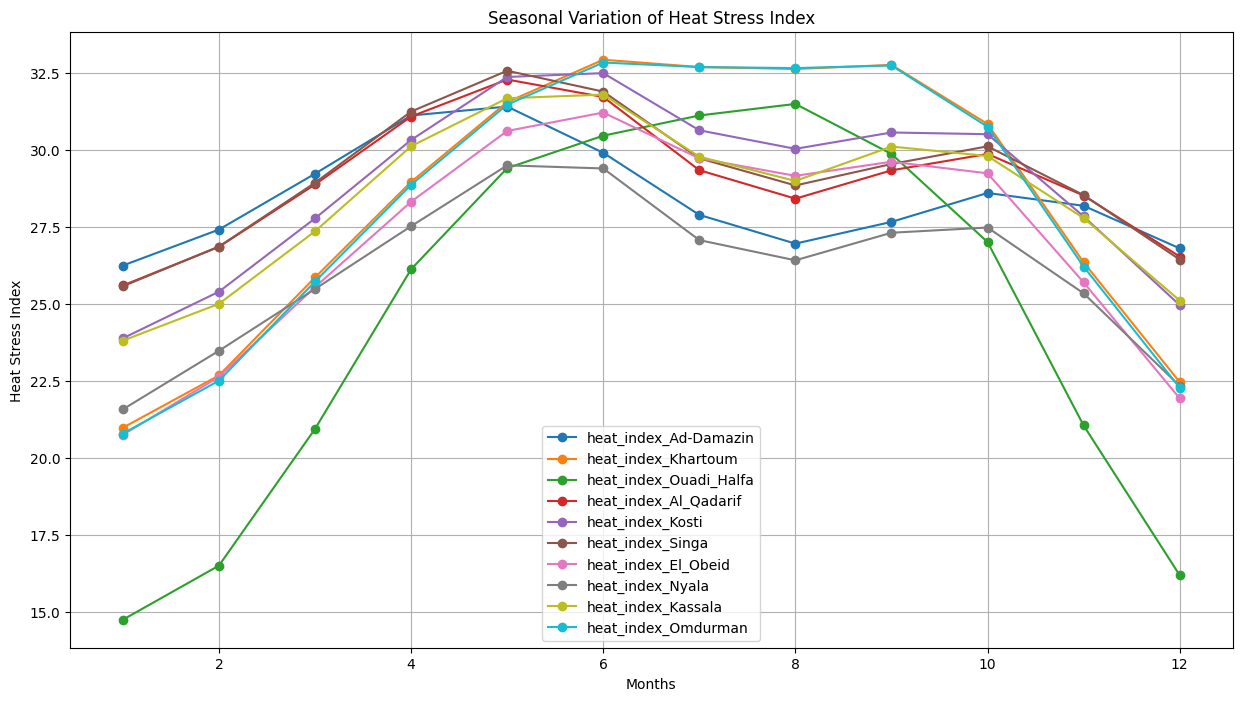

In [19]:
name =  ['heat_index_Ad-Damazin', 'heat_index_Khartoum', 'heat_index_Ouadi_Halfa',
'heat_index_Al_Qadarif', 'heat_index_Kosti', 'heat_index_Singa', 'heat_index_El_Obeid', 'heat_index_Nyala',
'heat_index_Kassala', 'heat_index_Omdurman']
plot_multiple_time_series(name)

In [4]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['HI_Damazin'], lags = 1000)
plt.grid()